In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import urllib
import datetime as dt

In [2]:
%matplotlib inline

#%matplotlib notebook

In [3]:
def download_file(file_url, output_file):
    urllib.request.urlretrieve(file_url, output_file)
    return '{0} downloaded succesfully'.format(output_file)


In [4]:
ftp_url = 'ftp://ftp.ncdc.noaa.gov/pub/data/ghcn/daily/'

In [5]:
file_name = 'readme.txt'
download_url = urllib.parse.urljoin(ftp_url, file_name)



In [6]:
with open('readme.txt','r') as readme_file:
    for line in readme_file.readlines()[392:405]:
        print(line.rstrip())

------------------------------
Variable   Columns   Type
------------------------------
ID            1-11   Character
LATITUDE     13-20   Real
LONGITUDE    22-30   Real
ELEVATION    32-37   Real
STATE        39-40   Character
NAME         42-71   Character
GSN FLAG     73-75   Character
HCN/CRN FLAG 77-79   Character
WMO ID       81-85   Character
------------------------------


In [7]:
file_name = 'ghcnd-stations.txt'
output_name = 'stations.txt'
download_url = urllib.parse.urljoin(ftp_url, file_name)

#download_file(download_url, output_name)

In [8]:
with open('stations.txt','r') as readme_file:
    for line in readme_file.readlines()[:10]:
        print(line.rstrip())

ACW00011604  17.1167  -61.7833   10.1    ST JOHNS COOLIDGE FLD
ACW00011647  17.1333  -61.7833   19.2    ST JOHNS
AE000041196  25.3330   55.5170   34.0    SHARJAH INTER. AIRP            GSN     41196
AEM00041194  25.2550   55.3640   10.4    DUBAI INTL                             41194
AEM00041217  24.4330   54.6510   26.8    ABU DHABI INTL                         41217
AEM00041218  24.2620   55.6090  264.9    AL AIN INTL                            41218
AF000040930  35.3170   69.0170 3366.0    NORTH-SALANG                   GSN     40930
AFM00040938  34.2100   62.2280  977.2    HERAT                                  40938
AFM00040948  34.5660   69.2120 1791.3    KABUL INTL                             40948
AFM00040990  31.5000   65.8500 1010.0    KANDAHAR AIRPORT                       40990


### Parse the selected columns from stations.txt

In [9]:
def parse_fixed_file(file_name, 
                     file_delimiter,
                     selected_columns,
                     column_types):
    return np.genfromtxt(file_name,
                         delimiter = file_delimiter,
                         usecols = selected_columns,
                         dtype = column_types)

In [10]:
file_delimiter = (11, 9, 10, 7, 3, 31, 4, 4, 6) 
selected_columns = [0, 5, 6] 

column_types = np.dtype([('ID', 'U11'),
                         ('NAME', 'S31'),
                         ('GSN_FLAG', 'U4')])

stations_raw = parse_fixed_file(file_name='stations.txt',
                                file_delimiter=file_delimiter,
                                selected_columns=selected_columns,
                                column_types=column_types)

In [11]:
stations_raw

array([('ACW00011604', b' ST JOHNS COOLIDGE FLD         ', '    '),
       ('ACW00011647', b' ST JOHNS                      ', '    '),
       ('AE000041196', b' SHARJAH INTER. AIRP           ', ' GSN'), ...,
       ('ZI000067977', b' BUFFALO RANGE                 ', '    '),
       ('ZI000067983', b' CHIPINGE                      ', ' GSN'),
       ('ZI000067991', b' BEITBRIDGE                    ', '    ')],
      dtype=[('ID', '<U11'), ('NAME', 'S31'), ('GSN_FLAG', '<U4')])

In [12]:
stations_raw.shape

(104126,)

In [14]:
gsn_stations = np.array([station for station in stations_raw if 'GSN' in station[2]])
print("Number of GSN stations:",len(gsn_stations))

Number of GSN stations: 991


In [15]:
gsn_stations['NAME'] = np.array([station_name.strip() for station_name in list(gsn_stations['NAME'])])
gsn_stations[:10]

array([('AE000041196', b'SHARJAH INTER. AIRP', ' GSN'),
       ('AF000040930', b'NORTH-SALANG', ' GSN'),
       ('AG000060390', b'ALGER-DAR EL BEIDA', ' GSN'),
       ('AG000060590', b'EL-GOLEA', ' GSN'),
       ('AG000060611', b'IN-AMENAS', ' GSN'),
       ('AG000060680', b'TAMANRASSET', ' GSN'),
       ('AJ000037989', b'ASTARA', ' GSN'),
       ('ALM00013615', b'TIRANA RINAS', ' GSN'),
       ('AM000037781', b'ARAGAC VISOKOGORNAYA', ' GSN'),
       ('AO000066160', b'LUANDA', ' GSN')],
      dtype=[('ID', '<U11'), ('NAME', 'S31'), ('GSN_FLAG', '<U4')])

In [16]:
station_mapping = {station[1]: station[0] for station in gsn_stations}
station_mapping

{b'ABILENE RGNL AP': 'USW00013962',
 b'ABU HAMED': 'SU000062640',
 b'ACAJUTLA': 'ES000078650',
 b'ADDIS ABABA-BOLE': 'ET000063450',
 b'ADIAKE': 'IV000065585',
 b'AEROP.INTERNACIONAL': 'MX000076644',
 b'AGADEZ': 'NG000061024',
 b'AGALEGA': 'MP000061974',
 b'AGATA': 'RSM00023383',
 b'AJAN': 'RSM00031168',
 b'AKITA': 'JA000047582',
 b'AKUREYRI': 'IC000004063',
 b'AL-JOUF': 'SA000040361',
 b'AL-MADINAH': 'SA000040430',
 b'ALBACETE LOS LLANOS': 'SP000008280',
 b'ALBANY AIRPORT': 'ASN00009741',
 b'ALBUQUERQUE INTL AP': 'USW00023050',
 b'ALDAN': 'RSM00031004',
 b'ALEKSANDROVSK-SAHALINSKIJ': 'RSM00032061',
 b'ALEKSANDROVSKOE': 'RSM00023955',
 b'ALERT CLIMATE': 'CA002400305',
 b'ALFRED FAURE (ILES CROZET)': 'FSM00061997',
 b'ALGER-DAR EL BEIDA': 'AG000060390',
 b'ALICE SPRINGS AIRPORT': 'ASN00015590',
 b'ALMATY': 'KZ000036870',
 b'ALTAY': 'CHM00051076',
 b'AM-TIMAN': 'CD000064754',
 b'AMBON/PATTIMURA': 'ID000097724',
 b'AMUNDSEN-SCOTT': 'AYW00090001',
 b'ANADYR': 'RSM00025563',
 b'ANALALAVA': '

In [18]:
def find_station_id(station_mapping, station_name):
    return station_mapping.get(station_name.encode(), None)

In [19]:
station_name = 'BANGALORE'

In [20]:
station_id = find_station_id(station_mapping, station_name) # gets the ID for the selected station

file_rel_path = 'gsn/{0}.dly'.format(station_id)
output_name = 'station_daily.txt'
download_url = urllib.parse.urljoin(ftp_url, file_rel_path) # url of the daily summary 

station_file_location = download_url.format(station_id)
urllib.request.urlretrieve(station_file_location, 'station_daily.txt')

('station_daily.txt', <email.message.Message at 0x195efb736d8>)

In [21]:
with open('readme.txt','r') as readme_file:
    for line in readme_file.readlines()[98:121]:
        print(line.rstrip())

------------------------------
Variable   Columns   Type
------------------------------
ID            1-11   Character
YEAR         12-15   Integer
MONTH        16-17   Integer
ELEMENT      18-21   Character
VALUE1       22-26   Integer
MFLAG1       27-27   Character
QFLAG1       28-28   Character
SFLAG1       29-29   Character
VALUE2       30-34   Integer
MFLAG2       35-35   Character
QFLAG2       36-36   Character
SFLAG2       37-37   Character
  .           .          .
  .           .          .
  .           .          .
VALUE31    262-266   Integer
MFLAG31    267-267   Character
QFLAG31    268-268   Character
SFLAG31    269-269   Character
------------------------------


In [22]:
file_delimiter = [11, 4, 2, 4] + [5, 1, 1, 1] * 31 
selected_columns = [1, 2, 3] + [4*i for i in range(1, 32)]

# column_types contains the column names and their data types
column_types = np.dtype([('YEAR', '>i4'),
                         ('MONTH', '>i4'),
                         ('PROCESS_TYPE', 'U4')] +
                        [('DAY_{0}'.format(i), '>i4') for i in range(1, 32)])

station_raw_data = parse_fixed_file(file_name='station_daily.txt',
                                    file_delimiter=file_delimiter,
                                    selected_columns=selected_columns,
                                    column_types=column_types)

In [23]:
print(station_raw_data[-5:])

[(2018, 5, 'TAVG',   269, 265,   259, 261,   270, 279, 278,   259, 272,   257,   244,   257,   249,   238,   248,   262,   267,   242, 259,   252,   241,   263,   237,   263,   235,   250,   260,   267,   256,   246,   256)
 (2018, 6, 'TMAX',   303, 310, -9999, 304, -9999, 297, 301,   290, 258, -9999, -9999, -9999,   283,   279, -9999,   310,   300,   289, 289, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999)
 (2018, 6, 'TMIN', -9999, 209,   208, 210,   212, 219, 217, -9999, 207,   205,   210,   210,   208,   210,   205,   201,   209,   203, 201, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999)
 (2018, 6, 'PRCP',     0,  15,    18,  61,     0,   0,   0,     0,  38,    13,    20,     0, -9999, -9999, -9999, -9999, -9999, -9999,   3, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999)
 (2018, 6, 'TAVG',   244, 238,   237, 238,   248, 256, 239,   233, 220,   226,   237,   242,   241,   23

In [24]:
print(station_raw_data['PROCESS_TYPE'][-10:])

['PRCP' 'TAVG' 'TMAX' 'TMIN' 'PRCP' 'TAVG' 'TMAX' 'TMIN' 'PRCP' 'TAVG']


In [25]:
min_year = station_raw_data[0]['YEAR']
max_year = station_raw_data[-1]['YEAR']

print(min_year, max_year)

1901 2018


In [26]:
def refactor_monthly_data(monthly_data):
    year = monthly_data['YEAR']
    month = monthly_data['MONTH']
    start = np.datetime64('{0}-{1:02}'.format(year, month))
    month_range = np.arange(start,
                            start + np.timedelta64(1, 'M'),
                            np.timedelta64(1, 'D'))
    current_month_data = [(date, monthly_data['DAY_' + str(day_nr+1)] / 10) for
                          day_nr, date
                          in enumerate(month_range)]
    return np.array(current_month_data,
                    dtype=[('DATE', 'M8[D]'), ('TEMPERATURE', 'd')])

In [30]:
def take_processing(station_data,
                    processing_type):
    daily_data = np.concatenate([refactor_monthly_data(raw_month)
                                 for raw_month
                                 in station_data
                                 if raw_month[2] == processing_type])
    daily_data['TEMPERATURE'][daily_data['TEMPERATURE'] == -999.9] = np.nan
    return daily_data

In [31]:
minimums = take_processing(station_raw_data, 'TMIN')
maximums = take_processing(station_raw_data, 'TMAX')
averages = take_processing(station_raw_data, 'TAVG')

No handles with labels found to put in legend.


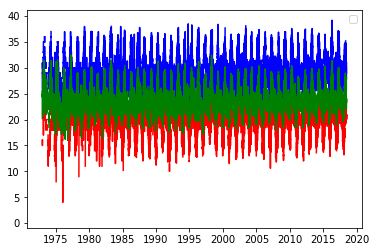

In [32]:
plt.plot(minimums['DATE'], minimums['TEMPERATURE'],color = 'r')
plt.plot(maximums['DATE'], maximums['TEMPERATURE'],color = 'b')
plt.plot(averages['DATE'], averages['TEMPERATURE'],color = 'g')
plt.legend()
plt.show()

In [52]:
nan_val = np.isnan(averages['TEMPERATURE'])
len(averages['TEMPERATURE'][nan_val])

634

In [53]:
number_averages = averages[~nan_val]
len(number_averages)

15983

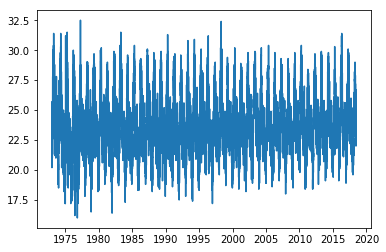

In [54]:
plt.plot(number_averages['DATE'], number_averages['TEMPERATURE'])

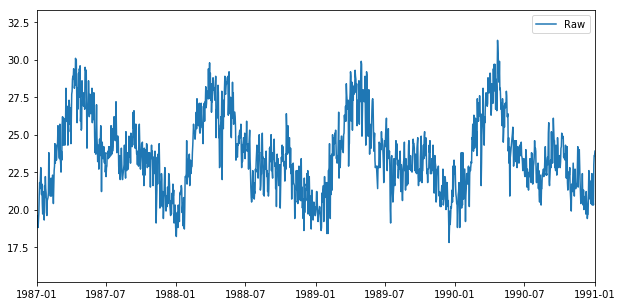

In [55]:
fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(10)

ax.set_xlim([np.datetime64('1987-01-01'), np.datetime64('1991-01-01')])

plt.plot(number_averages['DATE'], number_averages['TEMPERATURE'])

plt.legend(['Raw'])

In [56]:
def floating_avg(dataset, column_name, window=5):
    return np.correlate(dataset[column_name], np.ones((window,))/window, mode='same')

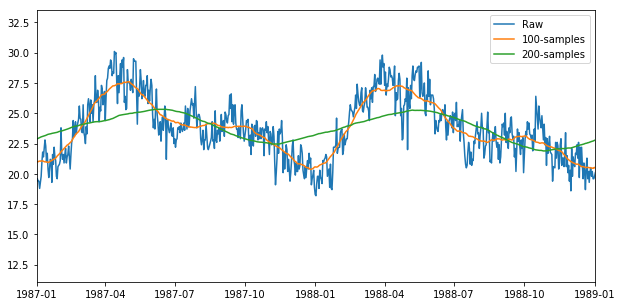

In [57]:
fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(10)

ax.set_xlim([np.datetime64('1987-01-01'), np.datetime64('1989-01-01')])

plt.plot(number_averages['DATE'], number_averages['TEMPERATURE'])
plt.plot(number_averages['DATE'], floating_avg(number_averages, 'TEMPERATURE', 60))
plt.plot(number_averages['DATE'], floating_avg(number_averages, 'TEMPERATURE', 200))

plt.legend(['Raw', '100-samples', '200-samples'])

## Calculating monthly averages

In [58]:
def get_monthly_data(dataset, year):
    act_monthly_avg = np.full((12, ), np.nan)
    for month_nr in range(1, 12+1):
        start_date = np.datetime64('{0}-{1:02}'.format(year, month_nr))
        end_date = start_date + np.timedelta64(1,'M')
        selected_range = number_averages[(number_averages['DATE'] >= start_date) &
                                         (number_averages['DATE'] <= end_date)]['TEMPERATURE']
        if not np.isnan(selected_range).all():
            act_monthly_avg[month_nr - 1] = np.mean(selected_range)
    return act_monthly_avg

In [59]:
def process_years(dataset, start_year, end_year):
    all_year_summary = None
    for act_year in np.arange(start_year, end_year + 1):
        act_monthly_avg = get_monthly_data(dataset, act_year)
        act_monthly_avg = np.insert(act_monthly_avg, 0 , act_year)
        if all_year_summary is None:
            all_year_summary = act_monthly_avg
            continue
        
        all_year_summary = np.vstack((all_year_summary, act_monthly_avg))
    return all_year_summary

In [60]:
result_array = process_years(number_averages, min_year, max_year)
result_array.shape

(118, 13)

In [61]:
result_array[0]

array([1901.,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan])

Ok, let's do something more interesting. Compare 2 consecutive months in one chart (january and february for example)

C:\ProgramData\Anaconda3\envs\py36\lib\site-packages\matplotlib\__init__.py:1717: MatplotlibDeprecationWarning: The *left* kwarg to `bar` is deprecated use *x* instead. Support for *left* will be removed in Matplotlib 3.0
  return func(ax, *args, **kwargs)


<Container object of 118 artists>

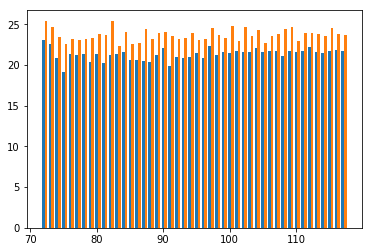

In [47]:
fig, ax = plt.subplots()
def_width = 0.4
left_range = np.arange(result_array.shape[0])
january_data = result_array[:, 1]
february_data = result_array[:, 2]

ax.bar(left=left_range, height=january_data, width=def_width)
ax.bar(left=left_range + def_width, height=february_data, width=def_width)

In [62]:
structured_result = np.core.records.fromarrays(result_array.transpose(),
                                               dtype=[('year', '<i4')] +
                                                     [('month_{0}'.format(i+1), '<f8') for i in range(12)])


In [63]:
structured_result[-1:].dtype

dtype((numpy.record, [('year', '<i4'), ('month_1', '<f8'), ('month_2', '<f8'), ('month_3', '<f8'), ('month_4', '<f8'), ('month_5', '<f8'), ('month_6', '<f8'), ('month_7', '<f8'), ('month_8', '<f8'), ('month_9', '<f8'), ('month_10', '<f8'), ('month_11', '<f8'), ('month_12', '<f8')]))

In [65]:
def get_month_name(month_number):
    return dt.datetime(1900, month_number, 1).strftime('%B')

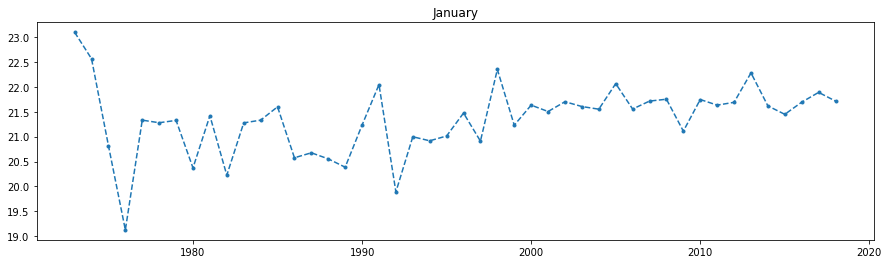

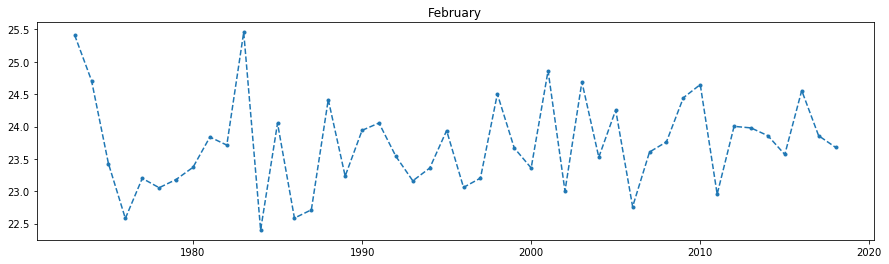

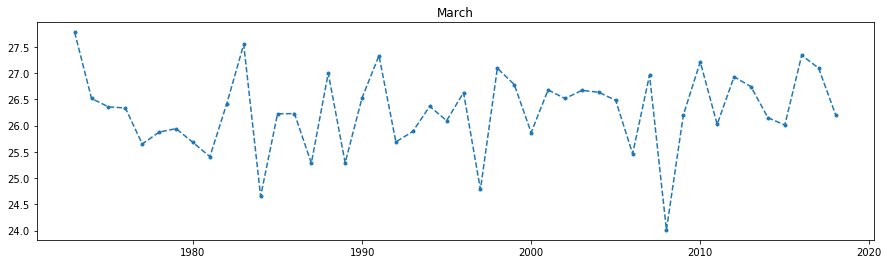

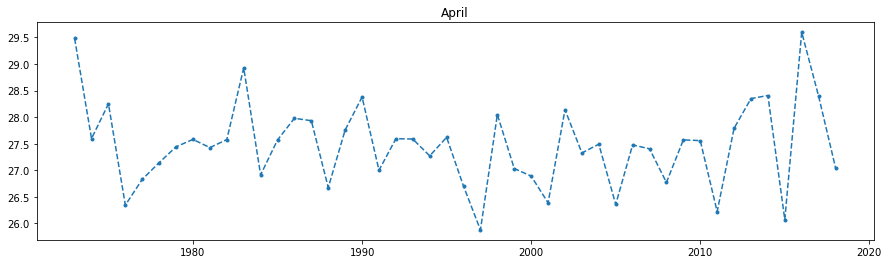

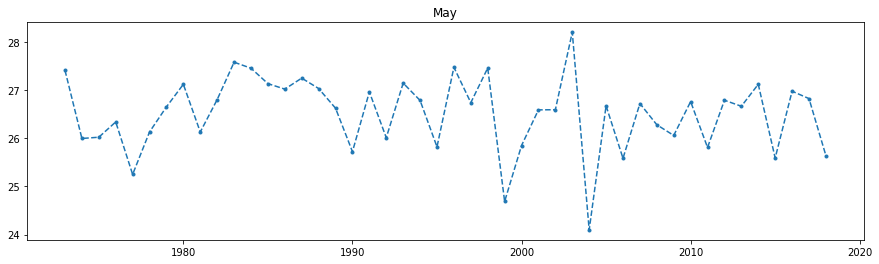

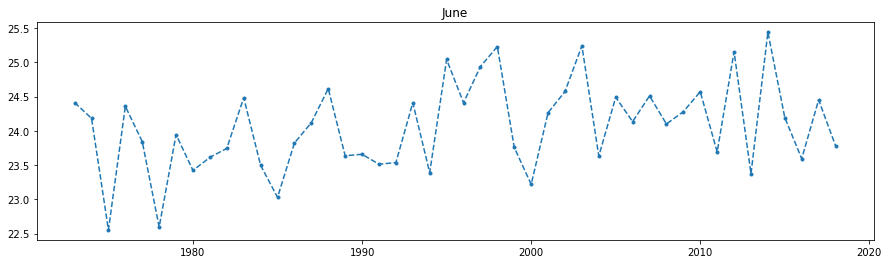

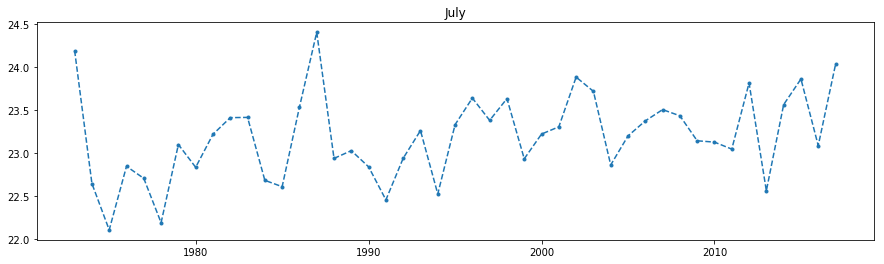

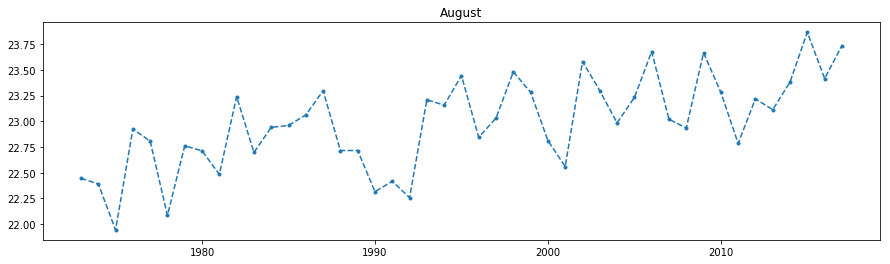

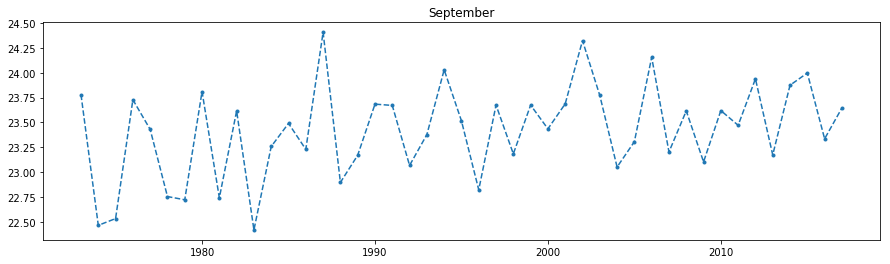

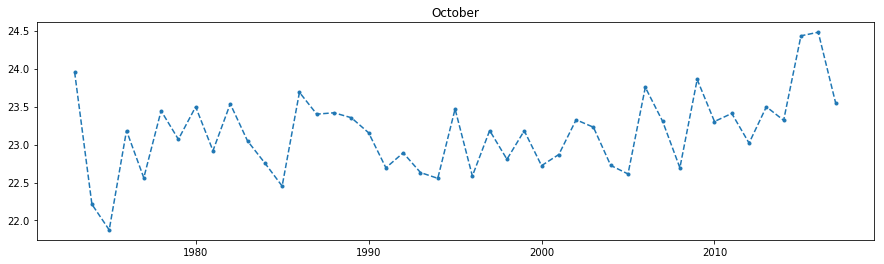

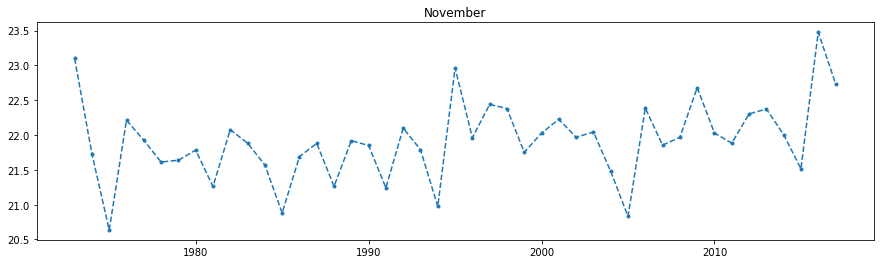

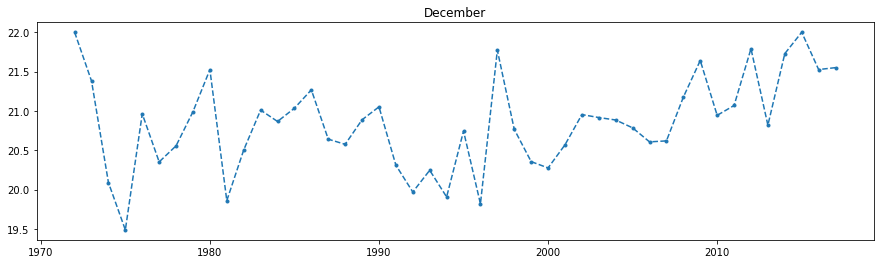

In [66]:
for i in range(12):
    fig, ax = plt.subplots()
    ax.plot(structured_result['year'], structured_result['month_{0}'.format(i + 1)], '.--')
    month_name = get_month_name(i + 1)
    ax.set_title(month_name)
    fig.set_figwidth(15)

In [81]:
def compare_months_scatter(temperature_dataset,
                           months_seq,
                           height=5,
                           width=10):
    fig, ax = plt.subplots(1)
    curve_names = []
    for i in months_seq:
        month_name = get_month_name(i)
        curve_names.append(month_name)
        ax.plot(temperature_dataset['year'],
                temperature_dataset['month_{0}'.format(i)],
                '.--')
        ax.set_title('Monthly comparison')
    fig.set_figheight(height)
    fig.set_figwidth(width)
    legend = ax.legend(curve_names)
    legend.set_frame_on(True)
    frame = legend.get_frame()
    frame.set_edgecolor('r')

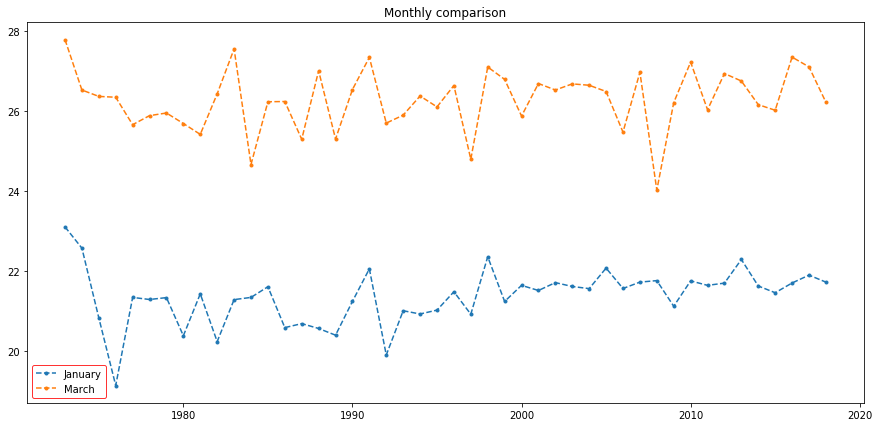

In [82]:
compare_months_scatter(structured_result, (1, 3), 7, 15)